In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Load supervised data
df = pd.read_csv("./DATA/Supervised_dataset.csv")
df.head()
# Separate features and labels


,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Annotation,Subject,Age,Gender,Height_cm,Weight_kg,Annotation_Numeric
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,1
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Relax,Subject1,30,M,177,94,1
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Relax,Subject1,30,M,177,94,1
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,1
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Relax,Subject1,30,M,177,94,1


In [2]:
df2=pd.read_csv('./DATA/windowed_features.csv')
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


In [3]:
df['Acc_magnitude']=np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)  

In [4]:
df.drop(columns=['AccX', 'AccY', 'AccZ','Gender','Height_cm','Weight_kg','Subject'], inplace=True)

In [5]:
df.rename(columns={'Annotation_Numeric': 'label'}, inplace=True)

In [6]:
df.head()

,SpO2,HR,Temp,EDA,Annotation,Age,label,Acc_magnitude
0,96.999969,89.000763,30.100043,0.083039,Relax,30,1,1.159528
1,96.999969,88.000137,30.100043,0.081028,Relax,30,1,1.153905
2,96.999969,87.000443,30.100043,0.083039,Relax,30,1,1.153905
3,96.999969,87.000443,30.100043,0.083039,Relax,30,1,1.160558
4,96.999969,87.000443,30.100043,0.081028,Relax,30,1,1.152042


In [7]:
df.drop(columns=['Annotation'], inplace=True)

In [8]:
features = df.drop('label', axis=1)
labels = df['label'].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Add label back for windowing
df_scaled['label'] = labels

# Set window size
window_size = 30
num_windows = len(df_scaled) // window_size

windowed_features = []
windowed_labels = []

for i in range(num_windows):
    window = df_scaled.iloc[i*window_size : (i+1)*window_size]
    
    # Only mean features
    means = window.drop('label', axis=1).mean().values
    
    # Label: majority vote in the window
    label = mode(window['label'], keepdims=False).mode.item()
    
    windowed_features.append(means)
    windowed_labels.append(label)

# Create DataFrame
columns = [f"{col}_mean" for col in features.columns]
windowed_df = pd.DataFrame(windowed_features, columns=columns)
windowed_df['label'] = windowed_labels

# Save result
windowed_df.to_csv("Supervised_windowed.csv", index=False)


In [9]:
df3=pd.read_csv('./DATA/Supervised_windowed.csv')

In [10]:
df3.shape

(1536, 7)

In [11]:
df2.shape

(1536, 5)

In [12]:
df3.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Age_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,1.069476,0.365992,1
1,0.292252,-0.073149,-0.782789,-0.782401,1.069476,0.349516,1
2,0.389524,-0.497982,-0.594906,-0.781311,1.069476,-0.384603,1
3,-0.213562,-0.386874,-0.432073,-0.780996,1.069476,-0.536413,1
4,-0.019018,-0.404306,-0.319343,-0.780714,1.069476,-0.533821,1


In [13]:
df3.drop(columns=['Age_mean'], inplace=True)

In [14]:
df3.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,0.365992,1
1,0.292252,-0.073149,-0.782789,-0.782401,0.349516,1
2,0.389524,-0.497982,-0.594906,-0.781311,-0.384603,1
3,-0.213562,-0.386874,-0.432073,-0.780996,-0.536413,1
4,-0.019018,-0.404306,-0.319343,-0.780714,-0.533821,1


In [15]:
df3['label'].value_counts()

label
1    799
0    278
3    239
2    220
Name: count, dtype: int64

In [16]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


In [17]:
feature_cols = ['SpO2_mean', 'HR_mean', 'Temp_mean', 'EDA_mean', 'Acc_magnitude_mean']
supervised_df = df3[feature_cols + ['label']]
unsupervised_df = df2[feature_cols]

In [18]:
# Separate features and labels
X_supervised = df3[feature_cols]
y_supervised = df3['label']

X_unsupervised = df2.copy()
y_unsupervised = np.full(X_unsupervised.shape[0], -1)  # unlabeled

# Combine
X_all = pd.concat([X_supervised, X_unsupervised], ignore_index=True)
y_all = np.concatenate([y_supervised, y_unsupervised])


In [19]:
X_all.shape

(3072, 5)

In [20]:
X_all.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Acc_magnitude_mean
0,0.370070,0.395262,-1.045836,-0.782714,0.365992
1,0.292252,-0.073149,-0.782789,-0.782401,0.349516
2,0.389524,-0.497982,-0.594906,-0.781311,-0.384603
3,-0.213562,-0.386874,-0.432073,-0.780996,-0.536413
4,-0.019018,-0.404306,-0.319343,-0.780714,-0.533821


In [21]:
y_all.shape


(3072,)

In [22]:
from sklearn.semi_supervised import LabelSpreading

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)
label_spread = LabelSpreading(kernel='rbf', alpha=0.2)
label_spread.fit(X_all, y_all)
predicted_labels = label_spread.transduction_



In [23]:
probs = label_spread.label_distributions_
confidences = probs.max(axis=1)
high_conf_mask = (y_all == -1) & (confidences > 0.9)


In [24]:
pseudo_df = X_all.iloc[high_conf_mask].copy()
pseudo_df['label'] = predicted_labels[high_conf_mask]

final_data = pd.concat([supervised_df, pseudo_df], ignore_index=True)


In [25]:
df2['predicted_label'] =predicted_labels[len(df3):]  # where df3 is your supervised data

df2.to_csv("unlabeled_with_predictions.csv", index=False)


In [26]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean,predicted_label
0,-0.782714,0.395262,-1.045836,0.370070,0.365992,1
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516,1
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603,1
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413,1
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821,1


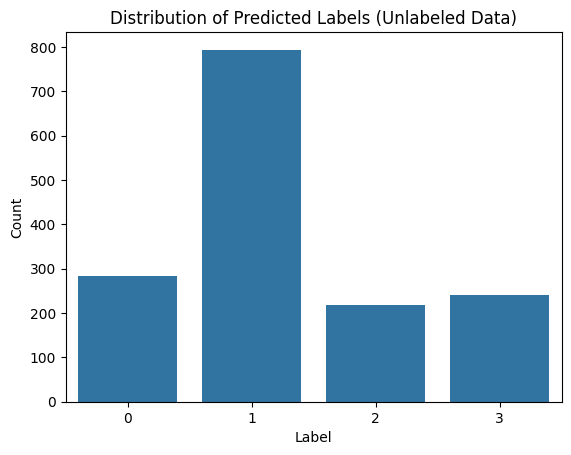

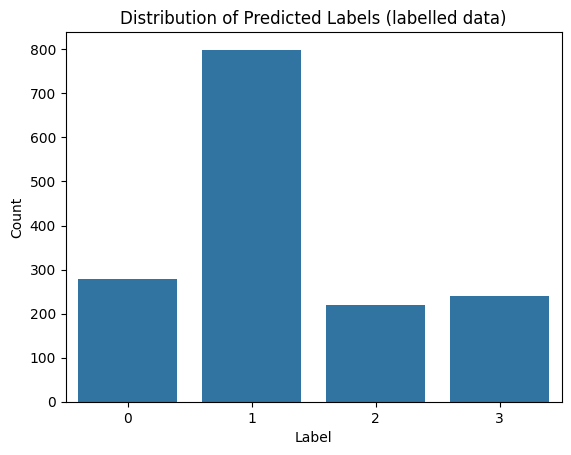

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize predicted labels
sns.countplot(x='predicted_label', data=df2)
plt.title("Distribution of Predicted Labels (Unlabeled Data)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#Visualize actual labels

sns.countplot(x='label', data=df3)
plt.title("Distribution of Predicted Labels (labelled data)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()




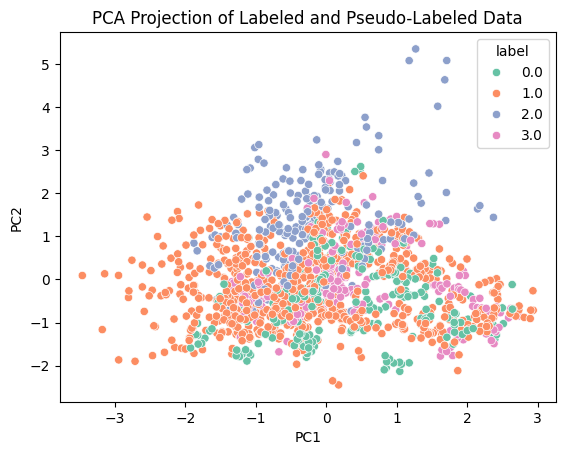

In [28]:
from sklearn.decomposition import PCA

# Optional: combine original + pseudo-labeled
combined_df = pd.concat([
    supervised_df,
    unsupervised_df.rename(columns={'predicted_label': 'label'})
], ignore_index=True)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_df[feature_cols])
combined_df['PC1'] = X_pca[:, 0]
combined_df['PC2'] = X_pca[:, 1]

# Plot
sns.scatterplot(data=combined_df, x='PC1', y='PC2', hue='label', palette='Set2')
plt.title("PCA Projection of Labeled and Pseudo-Labeled Data")
plt.show()


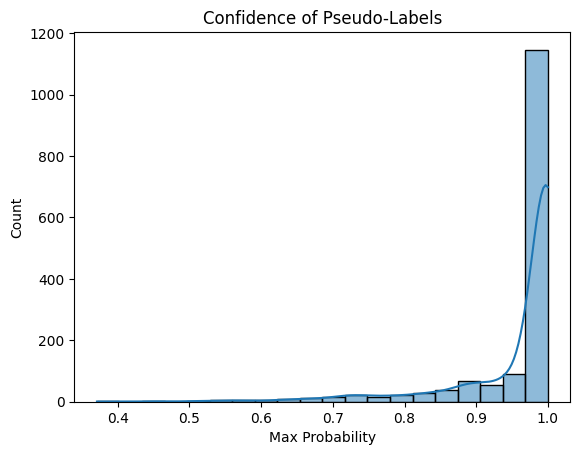

In [29]:
# Get label distributions
label_distributions = label_spread.label_distributions_

# Get max probability for each prediction (confidence)
pseudo_confidences = label_distributions[len(y_supervised):].max(axis=1)

# Visualize confidence
sns.histplot(pseudo_confidences, bins=20, kde=True)
plt.title("Confidence of Pseudo-Labels")
plt.xlabel("Max Probability")
plt.ylabel("Count")
plt.show()


In [30]:
df2['predicted_label'].value_counts()

predicted_label
1    794
0    283
3    240
2    219
Name: count, dtype: int64

In [31]:
df3['label'].value_counts()

label
1    799
0    278
3    239
2    220
Name: count, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = final_data[feature_cols]
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.33      0.44        95
           1       0.70      0.90      0.79       301
           2       0.69      0.65      0.67        83
           3       0.57      0.36      0.44        89

    accuracy                           0.68       568
   macro avg       0.66      0.56      0.59       568
weighted avg       0.68      0.68      0.66       568



In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.6362676056338028


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))    

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.96      0.97      0.97       301
           2       0.95      0.93      0.94        83
           3       0.94      0.96      0.95        89

    accuracy                           0.95       568
   macro avg       0.95      0.94      0.94       568
weighted avg       0.95      0.95      0.95       568



In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.9623239436619718


In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')        
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))    

c:\Users\sudee\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:02:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.97      0.98      0.97       301
           2       0.97      0.94      0.96        83
           3       0.97      0.94      0.95        89

    accuracy                           0.96       568
   macro avg       0.96      0.95      0.95       568
weighted avg       0.96      0.96      0.96       568



In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,300,400,500],
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8,0.9, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
y_pred_search = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_search)) 

Fitting 5 folds for each of 180 candidates, totalling 900 fits


c:\Users\sudee\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Best Accuracy: 0.8541994358719098
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        56
           1       0.84      0.93      0.88       160
           2       0.89      0.75      0.81        44
           3       0.83      0.79      0.81        48

    accuracy                           0.83       308
   macro avg       0.84      0.79      0.81       308
weighted avg       0.83      0.83      0.83       308



In [43]:
print("Train accuracy:", grid_search.score(X_train, y_train))
print("Test accuracy:", grid_search.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.8344155844155844


In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define parameter grid for randomized search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Set up the randomized search with 30 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run the search
random_search.fit(X_train, y_train)

# Print results
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\sudee\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
Best CV Accuracy: 0.8574614235938277
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        56
           1       0.85      0.93      0.89       160
           2       0.85      0.80      0.82        44
           3       0.88      0.79      0.84        48

    accuracy                           0.84       308
   macro avg       0.84      0.80      0.82       308
weighted avg       0.84      0.84      0.84       308



In [48]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 11.9 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [Mako]
   ---------------------------------------- 0/6 [Mako]
   ---------------------------------------- 0/6 [Mako]
   ---------------------------------------- 0/6 [Mako]
   ---------------------------------------- 0/6 [Mako]
   ------ --------------------------------- 1/6 [greenlet]
   ------ --------------------------------- 1/6 [greenlet]
   ------ --------------------------------- 1/6 [greenlet]
   ------ --------------------------------- 1/6 [greenlet]
   ------------- -------------------------- 2/6 [colorlog]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ---------------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    param = {
        'verbosity': 0,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }

    xgb = XGBClassifier(**param)
    score = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Start the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best parameters and score
print("Best parameters:", study.best_params)
print("Best CV accuracy:", study.best_value)

# Train final model with best params
best_model = XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


[I 2025-06-20 10:26:48,386] A new study created in memory with name: no-name-82983f32-3dad-4f54-a2a7-57ac23d2ad95
[I 2025-06-20 10:26:53,780] Trial 0 finished with value: 0.8460627177700349 and parameters: {'n_estimators': 331, 'max_depth': 9, 'learning_rate': 0.28016787194046633, 'subsample': 0.6255916425156539, 'colsample_bytree': 0.8342353949470951}. Best is trial 0 with value: 0.8460627177700349.
[I 2025-06-20 10:27:02,640] Trial 1 finished with value: 0.8444367015098722 and parameters: {'n_estimators': 455, 'max_depth': 6, 'learning_rate': 0.18142169836944488, 'subsample': 0.7268201894392003, 'colsample_bytree': 0.8477859547532604}. Best is trial 0 with value: 0.8460627177700349.
[I 2025-06-20 10:27:11,376] Trial 2 finished with value: 0.8403583872573421 and parameters: {'n_estimators': 480, 'max_depth': 9, 'learning_rate': 0.26466637386836045, 'subsample': 0.8184726308031487, 'colsample_bytree': 0.6161470039949807}. Best is trial 0 with value: 0.8460627177700349.
[I 2025-06-20 10

Best parameters: {'n_estimators': 364, 'max_depth': 7, 'learning_rate': 0.07547185770162415, 'subsample': 0.9376624668284208, 'colsample_bytree': 0.8064988504690007}
Best CV accuracy: 0.8542093910735027
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        56
           1       0.89      0.93      0.91       160
           2       0.83      0.77      0.80        44
           3       0.89      0.83      0.86        48

    accuracy                           0.87       308
   macro avg       0.85      0.83      0.84       308
weighted avg       0.87      0.87      0.87       308



In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
y_pred_search = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_search)) 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8550290360046457
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        56
           1       0.84      0.94      0.89       160
           2       0.87      0.75      0.80        44
           3       0.84      0.75      0.79        48

    accuracy                           0.85       308
   macro avg       0.85      0.79      0.82       308
weighted avg       0.85      0.85      0.84       308



# supervised model 

In [38]:
sdf=pd.read_csv('./DATA/Supervised_windowed.csv')   


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = sdf[feature_cols]
y = sdf['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.32      0.43        56
           1       0.65      0.87      0.75       160
           2       0.62      0.48      0.54        44
           3       0.55      0.38      0.44        48

    accuracy                           0.64       308
   macro avg       0.61      0.51      0.54       308
weighted avg       0.63      0.64      0.61       308



In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))    

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        56
           1       0.84      0.94      0.89       160
           2       0.87      0.75      0.80        44
           3       0.83      0.73      0.78        48

    accuracy                           0.85       308
   macro avg       0.85      0.79      0.82       308
weighted avg       0.85      0.85      0.84       308



In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')        
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))    

c:\Users\sudee\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        56
           1       0.88      0.93      0.90       160
           2       0.85      0.77      0.81        44
           3       0.87      0.85      0.86        48

    accuracy                           0.86       308
   macro avg       0.85      0.83      0.84       308
weighted avg       0.86      0.86      0.86       308

